## Sample characterization (Figure 2)

We are characterizing the sample.

In [7]:
# Import modules
import sys, h5py
import numpy as np
import scipy.misc
%matplotlib inline

# Import modules from src directory
sys.path.append("../src")
import plotting

### 1. Loading data from file

In [4]:
DMA_file = '../analysis/prep/batch2_feb12/DMA/Diayzed/size.txt' 
SEM_file = '../analysis/prep/omrv.tif'

In [5]:
# Load size distribution from DMA
data_dma = np.loadtxt(DMA_file, skiprows=0, delimiter='\t', usecols=[0,1,2], comments='#')
size_dma = data_dma[0:,0]
conc_dma = data_dma[0:,2]

In [41]:
# Load EM image
sem_image = scipy.misc.imread(SEM_file)[:750,1500:3000]
pixelsize = 100./ (2824-2342)  #[nm]
print "The pixelsize is %.2f nm" %pixelsize

The pixelsize is 0.21 nm


### 2. Plotting

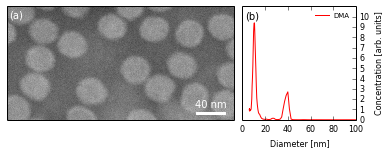

In [77]:
plot = plotting.Plot(rows=1, cols=3, exclude=[0,1], fontsize=8, legend=True, legend_frameon=False, save_pdf=True)
plot.add_axes((0,0), 2,1)
plot.title_label = 2*['']
plot.xlabel = [r'Diameter [nm]'] + ['']
plot.ylabel = [r'Concentration [arb. units]'] + ['']

# Plot the SEM image
plot.plotting_a_map(1,sem_image, cmap='gray')
plot.plotting_a_rectangle(1, 1250, 700, 40./pixelsize, 10, facecolor='w', edgecolor='w')
plot.axes[1].text(1250+20./pixelsize, 680, '40 nm', ha='center', va='bottom', fontsize=10, color='w')
plot.axes[1].set_xticks([])
plot.axes[1].set_yticks([])
plot.axes[1].set_xticklabels([])
plot.axes[1].set_yticklabels([])
plot.axes[1].text(20, 15, '(a)', color='w', va='top', ha='left', fontsize=10)
#plot.axes[1].annotate('', xy = (158, 60), xytext = (158+50, 60), fontsize = 10, 
#                      color = '#303030', 
#                      arrowprops=dict(edgecolor='blue', arrowstyle = '<->', shrinkA = 0, shrinkB = 0, lw=1))

# Plot the DMA size distribution
plot.plotting_traces(0, [size_dma], [conc_dma], ['DMA'], colors=['r'], xlim=[0,100], ylim=[0,11])
plot.axes[0].yaxis.set_label_position('right')
plot.axes[0].tick_params(axis='y', which='both', left='off', right='on', labelleft='off', labelright='on')
plot.axes[0].set_xticks(range(0,120,20))
plot.axes[0].set_yticks(range(0,11))
plot.axes[0].text(3, 10.6, '(b)', color='k', va='top', ha='left', fontsize=10)

# Save the plot
#plot.save('/Users/benedikt/phd-project/documentation/manuscripts/omrv-paper/manuscript/figures/fig_samplechar.pdf')
plot.show()

**Figure 2.**
(a) Negatively stained SEM (STEM mode) image of OmRV particles in a buffer of ammounium acetate.                                                                          
(b) Size distribution measured using DMA.